In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


# Data Science London + Scikit-learn

Bu projede bu, iki sınıftan (0 veya 1 olarak etiketlenmiştir) nesneleri temsil eden 40 özellikten oluşan sentetik bir veri kümesi kullanılarak makine öğrenmesi, sınıflandırma modelleri test edilmektedir.

Bu çalışmada kullanılan veriler [buradan](https://www.kaggle.com/c/data-science-london-scikit-learn/data) temin edilmiştir.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("/kaggle/input/data-science-london-scikit-learn/train.csv",header=None)
tl_df=pd.read_csv("/kaggle/input/data-science-london-scikit-learn/trainLabels.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [10]:
tl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [11]:
tl_df.columns=["class"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [13]:
df=pd.concat([df, tl_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [14]:
df.corr(numeric_only=True)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,class
0,1.000000,-0.029022,0.033437,0.012054,-0.022404,0.037209,0.019134,0.015277,-0.045568,-0.023777,...,0.023033,-0.004701,0.005180,0.012961,0.047455,-0.026327,0.038844,0.016098,-0.045840,-0.028058
1,-0.029022,1.000000,0.014202,0.009663,0.044758,-0.034173,-0.008474,0.006568,0.039895,0.008368,...,-0.052864,0.005583,0.009125,-0.026617,0.053087,0.039265,0.019537,-0.046295,-0.005667,-0.052153
2,0.033437,0.014202,1.000000,0.007579,0.019658,-0.013532,-0.054348,-0.008825,0.019443,-0.015920,...,-0.002177,-0.038702,0.046611,0.008141,0.014150,0.020865,0.030127,-0.004390,0.020101,-0.005618
3,0.012054,0.009663,0.007579,1.000000,0.023827,0.021305,-0.028903,-0.044407,0.001253,-0.049892,...,-0.006878,-0.030960,-0.018130,-0.055653,0.024811,0.048042,0.016295,0.041164,0.021217,-0.007439
4,-0.022404,0.044758,0.019658,0.023827,1.000000,0.027705,-0.338883,0.206964,0.063638,0.079723,...,0.007981,-0.325592,0.031156,-0.212497,0.015455,0.016657,0.021133,-0.084677,-0.227957,0.150652
5,0.037209,-0.034173,-0.013532,0.021305,0.027705,1.000000,-0.068367,0.036041,0.031510,-0.023893,...,-0.050032,0.016181,0.017013,0.019377,-0.034101,-0.009464,-0.046527,0.032984,0.013334,0.015151
6,0.019134,-0.008474,-0.054348,-0.028903,-0.338883,-0.068367,1.000000,-0.000915,-0.031153,0.065493,...,-0.020219,-0.105353,-0.025403,0.171086,-0.003786,0.090158,0.075050,-0.141340,-0.233928,-0.252976
7,0.015277,0.006568,-0.008825,-0.044407,0.206964,0.036041,-0.000915,1.000000,0.026522,0.040061,...,0.000762,0.049853,-0.040604,0.115860,-0.014349,0.124554,0.017283,-0.049654,-0.150962,0.040523
8,-0.045568,0.039895,0.019443,0.001253,0.063638,0.031510,-0.031153,0.026522,1.000000,0.016758,...,0.011961,-0.076989,-0.012986,0.016908,0.005058,-0.007465,0.015940,-0.019059,-0.041355,0.037534
9,-0.023777,0.008368,-0.015920,-0.049892,0.079723,-0.023893,0.065493,0.040061,0.016758,1.000000,...,0.055498,-0.037393,0.010608,-0.058954,0.001854,-0.004522,-0.034966,-0.020446,-0.070172,0.026841


<Axes: >

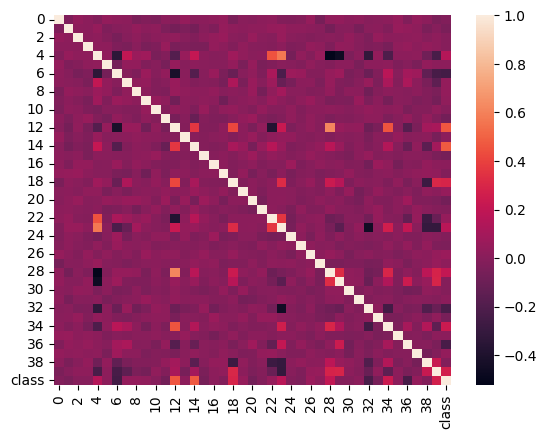

In [18]:
sns.heatmap(df.corr(numeric_only=True))

In [19]:
df["class"].value_counts()

class
1    510
0    490
Name: count, dtype: int64

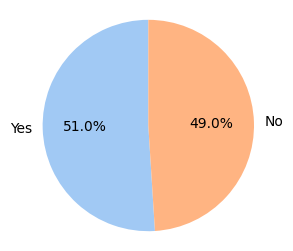

In [20]:
plt.figure(figsize=(3,3))
sns.set_palette('pastel')
plt.pie(df["class"].value_counts(), labels=["Yes", "No"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

## Modelleme

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [22]:
x=df.drop(["class"], axis=1)
y=df[["class"]]

In [23]:
algo_test(x,y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[117  28]
 [ 26 129]]
BernoulliNB()  modeli eğitiliyor!..
[[108  37]
 [ 35 120]]
LogisticRegression()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[115  30]
 [ 25 130]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[108  37]
 [ 35 120]]
RandomForestClassifier()  modeli eğitiliyor!..


/tmp/ipykernel_33/3015561559.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=model.fit(x_train,y_train)


[[118  27]
 [ 21 134]]
GradientBoostingClassifier()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[121  24]
 [ 16 139]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[127  18]
 [ 13 142]]
Eğitim tamamlandı.
En başarılı model:  KNeighborsClassifier
Confusion Matrix:
[[127  18]
 [ 13 142]]
classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       145
           1       0.89      0.92      0.90       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

Diğer Modeller:


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Accuracy,Precision,Recall,F1
KNeighborsClassifier,0.896667,0.896667,0.896667,0.896667
GradientBoostingClassifier,0.866667,0.866667,0.866667,0.866667
RandomForestClassifier,0.840000,0.840000,0.840000,0.840000
GaussianNB,0.820000,0.820000,0.820000,0.820000
LogisticRegression,0.816667,0.816667,0.816667,0.816667
BernoulliNB,0.760000,0.760000,0.760000,0.760000
DecisionTreeClassifier,0.760000,0.760000,0.760000,0.760000


In [24]:
kn=KNeighborsClassifier()
model=kn.fit(x,y)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [29]:
test=pd.read_csv("/kaggle/input/data-science-london-scikit-learn/test.csv", header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [30]:
test["Solution"]=model.predict(test)

In [31]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Solution
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387,1
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265,0
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784,1
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329,0
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213,0


In [33]:
test["Solution"].value_counts()

Solution
1    4610
0    4390
Name: count, dtype: int64

In [36]:
sb=test[["Solution"]].reset_index().rename(columns={'index': 'Id'})
sb["Id"]=sb["Id"]+1
sb.to_csv('submission.csv', index=False)

## Sonuç

40 farklı özellikliği bulunan nesnelerin iki (0 ve 1) sınıfa ayrıldığı bu projede geliştirilen sınıflandırma modellerinden `KNeighborsClassifier` modeli yaklaşık %90 doğruluk skoru ile en yüksek başarıya ulaşmıştır.